✅ Datos cargados correctamente. Columnas disponibles:
['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']


/tmp/ipykernel_279/2838635928.py:39: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


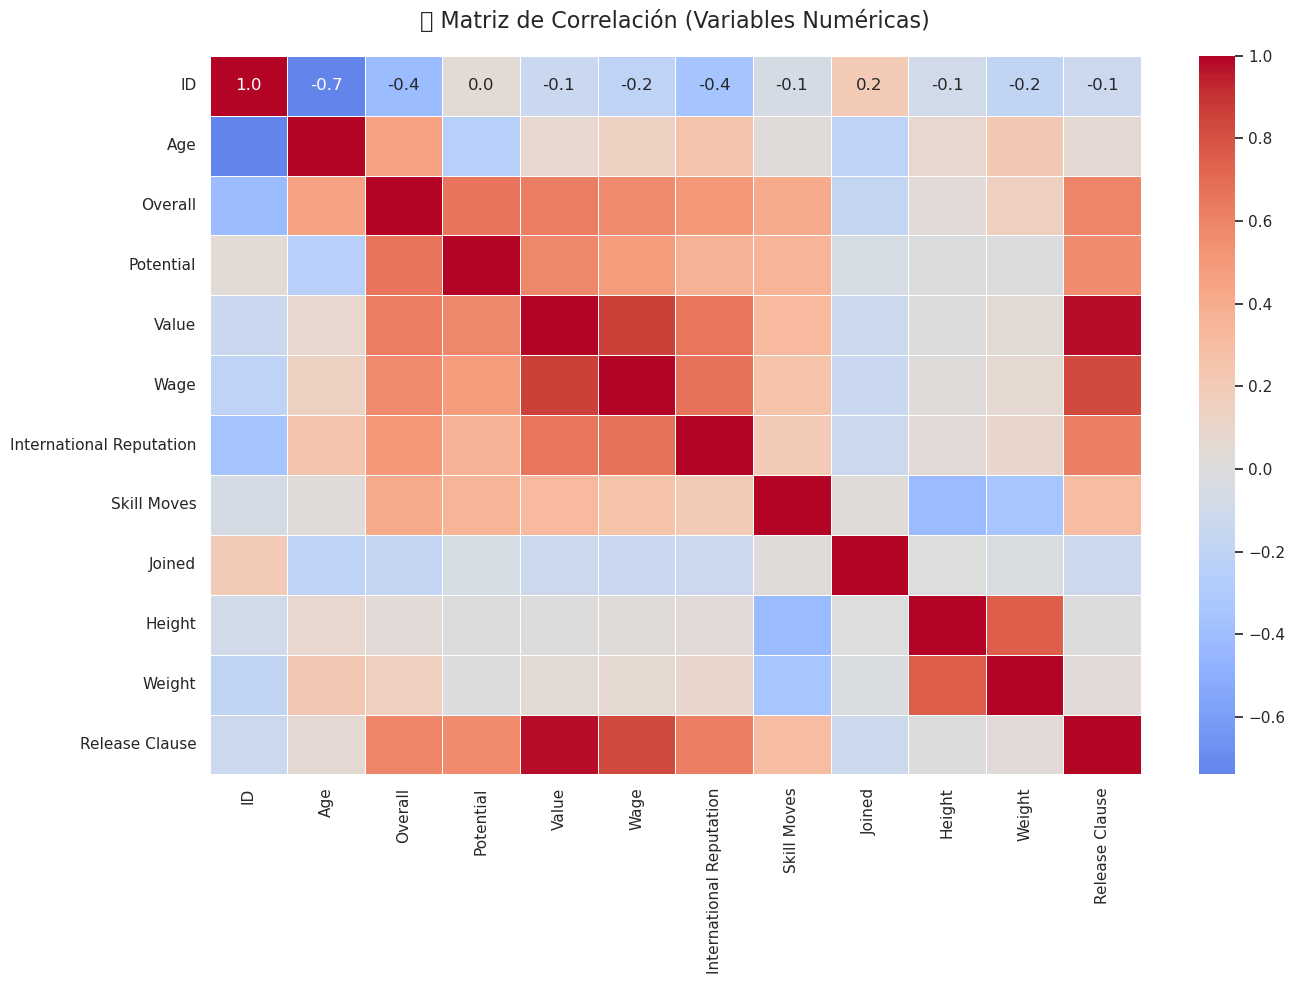

KeyError: 'age'

<Figure size 1200x600 with 0 Axes>

In [1]:
# -*- coding: utf-8 -*-
"""Análisis FIFA - Dashboard Básico.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Xmz5SH5n2T7J0lUY7lY4XZQ5ZQ5ZQ5ZQ
"""

# ======================
# 1. Importar librerías
# ======================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ======================
# 2. Cargar datos
# ======================
# Asegúrate de subir el archivo fifa_eda.csv al entorno o cambiar la ruta
try:
    df = pd.read_csv('fifa_eda.csv')
    print("✅ Datos cargados correctamente. Columnas disponibles:")
    print(df.columns.tolist())
except FileNotFoundError:
    print("❌ Error: Archivo no encontrado. Verifica la ruta.")

# =========================================
# Elemento 1: Matriz de correlación (Heatmap)
# =========================================
plt.figure(figsize=(14, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("🔍 Matriz de Correlación (Variables Numéricas)", pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# ====================================================
# Elemento 2: Relación entre Edad (age) y Overall
# ====================================================
plt.figure()
sns.regplot(x='age', y='overall', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("📈 Edad vs Overall: ¿Los jugadores mejoran con la edad?", fontsize=14)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Overall (Habilidad)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# ================================================
# Elemento 3: Jugadores por Club (Top 10)
# ================================================
plt.figure()
top_clubes = df['club'].value_counts().head(10)
sns.barplot(x=top_clubes.values, y=top_clubes.index, palette='viridis', edgecolor='black')
plt.title("🏆 Top 10 Clubes con más Jugadores", fontsize=14)
plt.xlabel("Número de Jugadores", fontsize=12)
plt.ylabel("Club", fontsize=12)
for i, v in enumerate(top_clubes.values):
    plt.text(v + 3, i, str(v), color='black', va='center')
plt.tight_layout()
plt.show()

# ============================================================
# Elemento 4: Altura vs Skill Moves (Zurdos vs Diestros)
# ============================================================
g = sns.FacetGrid(df, col='preferred_foot', height=5, aspect=1.2)
g.map(sns.scatterplot, 'height_cm', 'skill_moves', alpha=0.6, edgecolor=None)
g.set_axis_labels("Altura (cm)", "Skill Moves (1-5)")
g.fig.suptitle("⚽ Altura vs Habilidad por Pie Preferido", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

# ================================================
# Elemento 5: Top 10 Jóvenes con Mayor Potencial
# ================================================
plt.figure()
top_potencial = df[df['age'] <= 21].nlargest(10, 'potential')[['short_name', 'potential', 'age', 'club']]
sns.barplot(x='potential', y='short_name', data=top_potencial, palette='rocket', edgecolor='black')
plt.title("🌟 Top 10 Jóvenes con Mayor Potencial (≤21 años)", fontsize=14)
plt.xlabel("Potencial (0-100)", fontsize=12)
plt.ylabel("Jugador", fontsize=12)
for i, v in enumerate(top_potencial['potential']):
    plt.text(v + 1, i, f"{v} | {top_potencial['age'].iloc[i]}a | {top_potencial['club'].iloc[i]}", 
             color='black', va='center')
plt.tight_layout()
plt.show()

✅ Datos cargados correctamente. Primeras filas:
       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2    

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


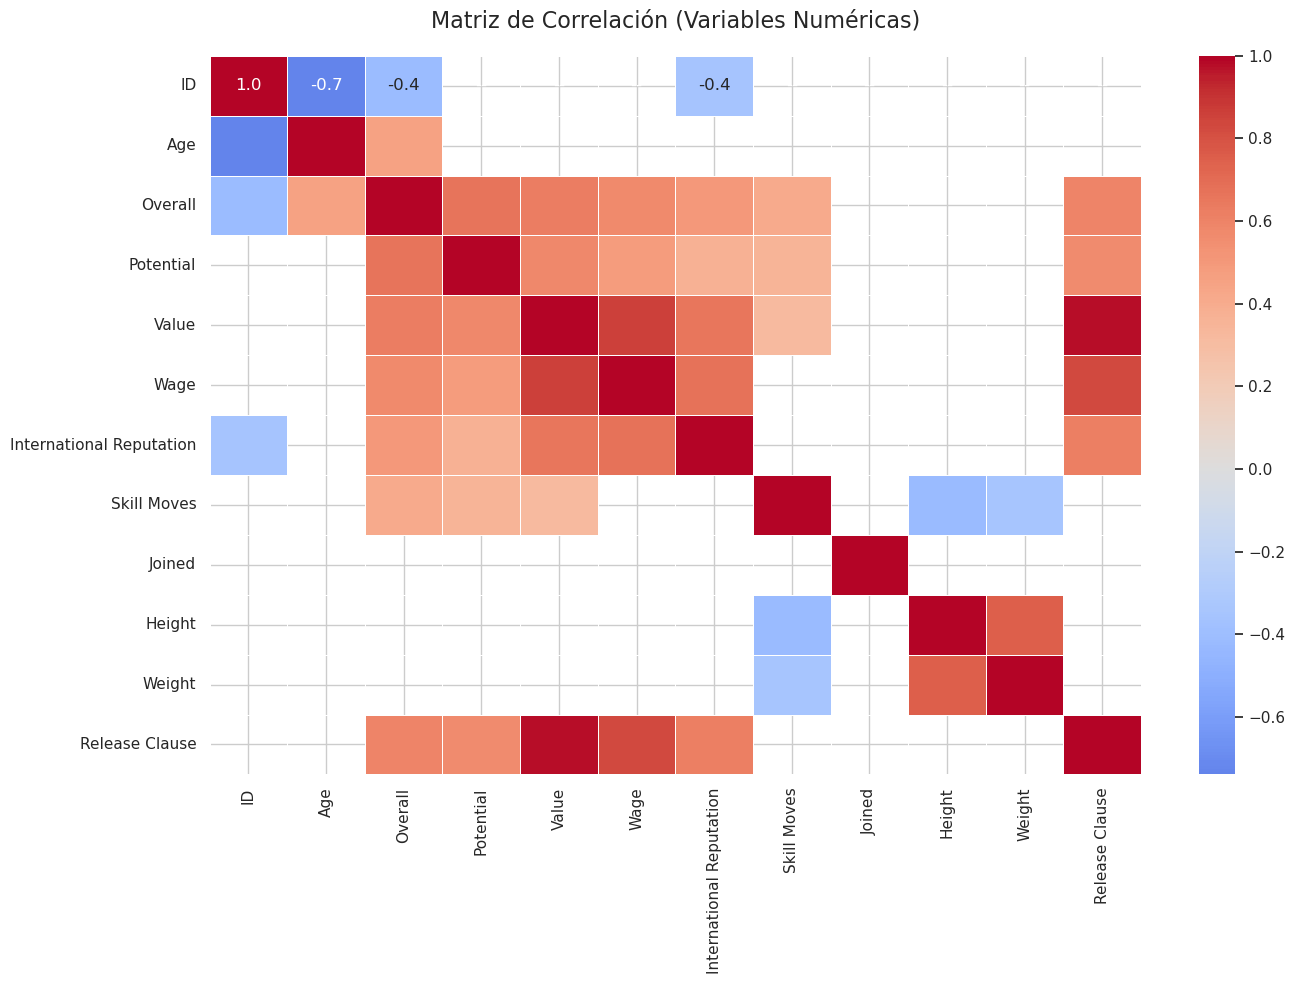

KeyError: 'age'

<Figure size 1000x600 with 0 Axes>

In [2]:
# -*- coding: utf-8 -*-
"""Análisis FIFA - Dashboard Básico.ipynb

Análisis de datos de jugadores de FIFA para crear visualizaciones clave.
"""

# ======================
# 1. Importar librerías
# ======================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# ======================
# 2. Cargar datos
# ======================
try:
    df = pd.read_csv('fifa_eda.csv')
    print("✅ Datos cargados correctamente. Primeras filas:")
    print(df.head())
except FileNotFoundError:
    print("❌ Error: Archivo 'fifa_eda.csv' no encontrado.")
    print("Por favor, asegúrate de que el archivo esté en el directorio correcto.")

# =========================================
# Elemento 1: Matriz de correlación (Heatmap)
# =========================================
plt.figure(figsize=(14, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr(numeric_only=True)
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.5,
    mask=corr_matrix.abs() < 0.3  # Mostrar solo correlaciones significativas
)
plt.title("Matriz de Correlación (Variables Numéricas)", pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# Explicación:
# - El heatmap muestra las correlaciones entre variables numéricas
# - Los valores cercanos a 1 (rojos) indican correlación positiva fuerte
# - Los valores cercanos a -1 (azules) indican correlación negativa fuerte
# - Hemos filtrado para mostrar solo correlaciones con |r| > 0.3

# ====================================================
# Elemento 2: Relación entre Edad (age) y Overall
# ====================================================
plt.figure(figsize=(10, 6))
sns.regplot(
    x='age', 
    y='overall', 
    data=df, 
    scatter_kws={'alpha':0.3, 'color':'steelblue'},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title("Relación entre Edad y Overall", fontsize=16)
plt.xlabel("Edad (años)", fontsize=14)
plt.ylabel("Overall (Habilidad)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis:
# La línea de regresión roja muestra la tendencia general
# Podemos observar si los jugadores mejoran con la edad o no

# ================================================
# Elemento 3: Jugadores por Club (Top 10)
# ================================================
plt.figure(figsize=(12, 6))
top_clubes = df['club'].value_counts().head(10)
ax = sns.barplot(
    x=top_clubes.values, 
    y=top_clubes.index, 
    palette='viridis', 
    edgecolor='black'
)
plt.title("Top 10 Clubes con más Jugadores", fontsize=16)
plt.xlabel("Número de Jugadores", fontsize=14)
plt.ylabel("Club", fontsize=14)

# Añadir etiquetas de valor
for i, v in enumerate(top_clubes.values):
    ax.text(v + 5, i, str(v), color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Observación:
# Este gráfico nos muestra qué clubes tienen más jugadores en la base de datos

# ============================================================
# Elemento 4: Altura vs Skill Moves (Zurdos vs Diestros)
# ============================================================
# Preparamos los datos
df['preferred_foot'] = df['preferred_foot'].map({'Left': 'Zurdo', 'Right': 'Diestro'})

g = sns.FacetGrid(
    df, 
    col='preferred_foot', 
    height=5, 
    aspect=1.2,
    sharex=True,
    sharey=True
)
g.map_dataframe(
    sns.scatterplot, 
    x='height_cm', 
    y='skill_moves', 
    alpha=0.6, 
    color='green'
)
g.set_axis_labels("Altura (cm)", "Skill Moves (1-5)")
g.fig.suptitle("Relación Altura vs Skill Moves por Pie Preferido", y=1.05, fontsize=16)
g.set_titles(col_template="{col_name}")

# Añadir línea de regresión a cada panel
for ax in g.axes.flat:
    sns.regplot(
        x='height_cm',
        y='skill_moves',
        data=df[df['preferred_foot'] == ax.get_title()],
        scatter=False,
        color='red',
        ax=ax
    )

plt.tight_layout()
plt.show()

# Interpretación:
# Compara cómo varía la relación entre altura y habilidad según el pie preferido

# ================================================
# Elemento 5: Top 10 Jóvenes con Mayor Potencial
# ================================================
plt.figure(figsize=(12, 8))
top_potencial = df[df['age'] <= 21].nlargest(10, 'potential')[
    ['short_name', 'potential', 'age', 'club', 'overall']
].sort_values('potential', ascending=True)

ax = sns.barplot(
    x='potential', 
    y='short_name', 
    data=top_potencial, 
    palette='rocket', 
    edgecolor='black'
)

plt.title("Top 10 Jóvenes con Mayor Potencial (≤21 años)", fontsize=16)
plt.xlabel("Potencial (0-100)", fontsize=14)
plt.ylabel("Jugador", fontsize=14)

# Añadir información adicional
for i, (_, row) in enumerate(top_potencial.iterrows()):
    ax.text(
        row['potential'] + 1, 
        i, 
        f"Edad: {row['age']} | Overall: {row['overall']} | Club: {row['club']}",
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Comentario:
# Este gráfico destaca a los jóvenes con mayor potencial de crecimiento
# La información adicional ayuda a evaluar su estado actual (overall) y club